In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read data file university_rankings.csv in pandas dataframe and answer the following questions.

## Find out number of rows and columns using shape attribute

In [3]:
ur = pd.read_csv('Data/university_rankings.csv')

In [4]:
ur.shape

(2200, 14)

## Check first eight rows using head method.

In [5]:
ur.head(8)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012


## Use describe method on this dataframe.

In [6]:
ur.describe().loc['25%', 'publications']

175.75

## Find out the data is for which years using years column?

In [7]:
ur.year

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
2195    2015
2196    2015
2197    2015
2198    2015
2199    2015
Name: year, Length: 2200, dtype: int64

## Find out which all columns have missing values?

In [11]:
ur.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [12]:
ur.broad_impact.isnull().sum()

200

In [13]:
ur.broad_impact

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
2195    969.0
2196    981.0
2197    975.0
2198    975.0
2199    981.0
Name: broad_impact, Length: 2200, dtype: float64

In [14]:
ur[ur.broad_impact.isnull()].head().tail()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


## Universities from how many countries are available in this data?

In [15]:
ur.institution.value_counts()

University of Texas Southwestern Medical Center    4
Tohoku University                                  4
Texas A&M University, College Station              4
Harvard University                                 4
University of California, Los Angeles              4
                                                  ..
École centrale de Lyon                             1
National Dong Hwa University                       1
Tamkang University                                 1
Henan Normal University                            1
Tianjin Medical University                         1
Name: institution, Length: 1024, dtype: int64

In [16]:
ur.country

0                  USA
1                  USA
2                  USA
3       United Kingdom
4                  USA
             ...      
2195          Portugal
2196             Egypt
2197            Brazil
2198             Spain
2199             China
Name: country, Length: 2200, dtype: object

In [16]:
pd.crosstab(ur.institution, ur.country).sum()

country
Argentina                 7
Australia                58
Austria                  24
Belgium                  20
Brazil                   36
Bulgaria                  2
Canada                   72
Chile                     8
China                   167
Colombia                  4
Croatia                   2
Cyprus                    2
Czech Republic           10
Denmark                  12
Egypt                     8
Estonia                   2
Finland                  20
France                  109
Germany                 115
Greece                   14
Hong Kong                12
Hungary                  12
Iceland                   2
India                    31
Iran                     16
Ireland                  16
Israel                   22
Italy                    96
Japan                   159
Lebanon                   2
Lithuania                 2
Malaysia                  6
Mexico                    4
Netherlands              29
New Zealand              12
Norway      

In [17]:
pd.crosstab(ur.institution, ur.country).sum().count()

59

### OR WE CAN DO BY : df.country.nunique()

## Which country has highest number of universities for year 2015?

In [18]:
ur.country

0                  USA
1                  USA
2                  USA
3       United Kingdom
4                  USA
             ...      
2195          Portugal
2196             Egypt
2197            Brazil
2198             Spain
2199             China
Name: country, Length: 2200, dtype: object

In [19]:
ur.year

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
2195    2015
2196    2015
2197    2015
2198    2015
2199    2015
Name: year, Length: 2200, dtype: int64

In [20]:
ur.institution

0                          Harvard University
1       Massachusetts Institute of Technology
2                         Stanford University
3                     University of Cambridge
4          California Institute of Technology
                        ...                  
2195                University of the Algarve
2196                    Alexandria University
2197              Federal University of Ceará
2198                   University of A Coruña
2199          China Pharmaceutical University
Name: institution, Length: 2200, dtype: object

In [21]:
ur[(ur.year == 2015) & (ur.institution == ur.country)]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year


In [22]:
ur.groupby('institution', 'year' == 2015).country.max()

institution
AGH University of Science and Technology            Poland
Aalborg University                                 Denmark
Aalto University                                   Finland
Aarhus University                                  Denmark
Aberystwyth University                      United Kingdom
                                                 ...      
École centrale de Lyon                              France
École normale supérieure - Paris                    France
École normale supérieure de Cachan                  France
École normale supérieure de Lyon                    France
Örebro University                                   Sweden
Name: country, Length: 1024, dtype: object

In [23]:
ur.groupby('institution', 'year' == 2015).agg(['count', 'max'])

world_rank      country  \
                                              count  max   count   
institution                                                        
AGH University of Science and Technology          2  782       2   
Aalborg University                                2  593       2   
Aalto University                                  2  421       2   
Aarhus University                                 2  122       2   
Aberystwyth University                            2  814       2   
...                                             ...  ...     ...   
École centrale de Lyon                            1  881       1   
École normale supérieure - Paris                  4   64       4   
École normale supérieure de Cachan                1  721       1   
École normale supérieure de Lyon                  2  471       2   
Örebro University                                 2  656       2   

                                                         national_rank      \
                                                     max         count max   
institution                                                                  
AGH University of Science and Technology          Poland             2   4   
Aalborg University                               Denmark             2   5   
Aalto University                                 Finland             2   4   
Aarhus University                                Denmark             2   2   
Aberystwyth University                    United Kingdom             2  59   
...                                                  ...           ...  ..   
École centrale de Lyon                            France             1  45   
École normale supérieure - Paris                  France             4   3   
École normale supérieure de Cachan                France             1  32   
École normale supérieure de Lyon                  France             2  18   
Örebro University                                 Sweden             2  11   

                                         quality_of_education       \
                                                        count  max   
institution                                                          
AGH University of Science and Technology                    2  267   
Aalborg University                                          2  367   
Aalto University                                            2  367   
Aarhus University                                           2  310   
Aberystwyth University                                      2  367   
...                                                       ...  ...   
École centrale de Lyon                                      1  367   
École normale supérieure - Paris                            4    8   
École normale supérieure de Cachan                          1  121   
École normale supérieure de Lyon                            2  367   
Örebro University                                           2  367   

                                         alumni_employment       ...  \
                                                     count  max  ...   
institution                                                      ...   
AGH University of Science and Technology                 2  279  ...   
Aalborg University                                       2  439  ...   
Aalto University                                         2  251  ...   
Aarhus University                                        2  188  ...   
Aberystwyth University                                   2  567  ...   
...                                                    ...  ...  ...   
École centrale de Lyon                                   1  255  ...   
École normale supérieure - Paris                         4  502  ...   
École normale supérieure de Cachan                       1  323  ...   
École normale supérieure de Lyon                         2  567  ...   
Örebro University                                        2  529  ...   

     

In [20]:
ur = pd.read_csv('Data/university_rankings.csv')
d = ur.loc[ur.year == 2015, :]

In [23]:
d.country.value_counts()

USA                     229
China                    83
Japan                    74
United Kingdom           65
Germany                  55
France                   49
Italy                    47
Spain                    40
South Korea              36
Canada                   33
Australia                27
Taiwan                   21
Brazil                   18
India                    16
Netherlands              13
Austria                  12
Sweden                   11
Belgium                  10
Turkey                   10
Poland                    9
Finland                   9
Switzerland               9
Iran                      8
Ireland                   8
Greece                    7
Portugal                  7
Israel                    7
Hungary                   6
Hong Kong                 6
New Zealand               6
Czech Republic            5
South Africa              5
Norway                    5
Denmark                   5
Russia                    5
Saudi Arabia        

## Find out top 10 Institute in terms of number of publications for year 2014?

In [26]:
ur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [27]:
ur.groupby('country').year.agg(['count','mean','min','max'])


,count,mean,min,max
country,,,,
Argentina,7,2014.428571,2014,2015
Australia,58,2014.362069,2012,2015
Austria,24,2014.500000,2014,2015
Belgium,20,2014.500000,2014,2015
Brazil,36,2014.500000,2014,2015
Bulgaria,2,2014.500000,2014,2015
Canada,72,2014.319444,2012,2015
Chile,8,2014.500000,2014,2015
China,167,2014.497006,2014,2015


In [27]:
d = ur.loc[ur.year == 2014, :]

In [25]:
d = d.sort_values('publications', ascending=False)
d['institution'].head(10)

1019          National University of Ireland, Maynooth
1176             University of Puerto Rico at Mayagüez
938                   University of Évry Val d'Essonne
1169                               University of Seoul
722                               École Centrale Paris
1148                                Ibaraki University
1162    University of Chemistry and Technology, Prague
822                             Albany Medical College
1034       Queens College, City University of New York
737                               University of Dayton
Name: institution, dtype: object

In [28]:
d = d.sort_values('publications', ascending=False).head(10).loc[ : , ["institution", "publications"]]

## How many Institutes from India are available in this data in each year?

In [30]:
ur = pd.read_csv('Data/university_rankings.csv')
In = ur[ur.country == 'India']

In [31]:
In.groupby('year')['institution'].count()

year
2014    15
2015    16
Name: institution, dtype: int64

## Plot a bar graph showing number of universities from each country for year 2012

In [29]:
ur = pd.read_csv('Data/university_rankings.csv')

In [30]:
d = ur.loc[ur.year == 2012, :]

In [35]:
d.groupby('country')['institution'].count()

country
Australia          2
Canada             3
Denmark            1
Finland            1
France             5
Germany            3
Israel             4
Italy              1
Japan              5
Netherlands        2
Norway             1
South Korea        1
Sweden             1
Switzerland        4
USA               58
United Kingdom     8
Name: institution, dtype: int64

<AxesSubplot:>

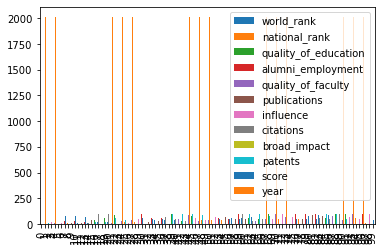

In [36]:
d.plot(kind='bar')

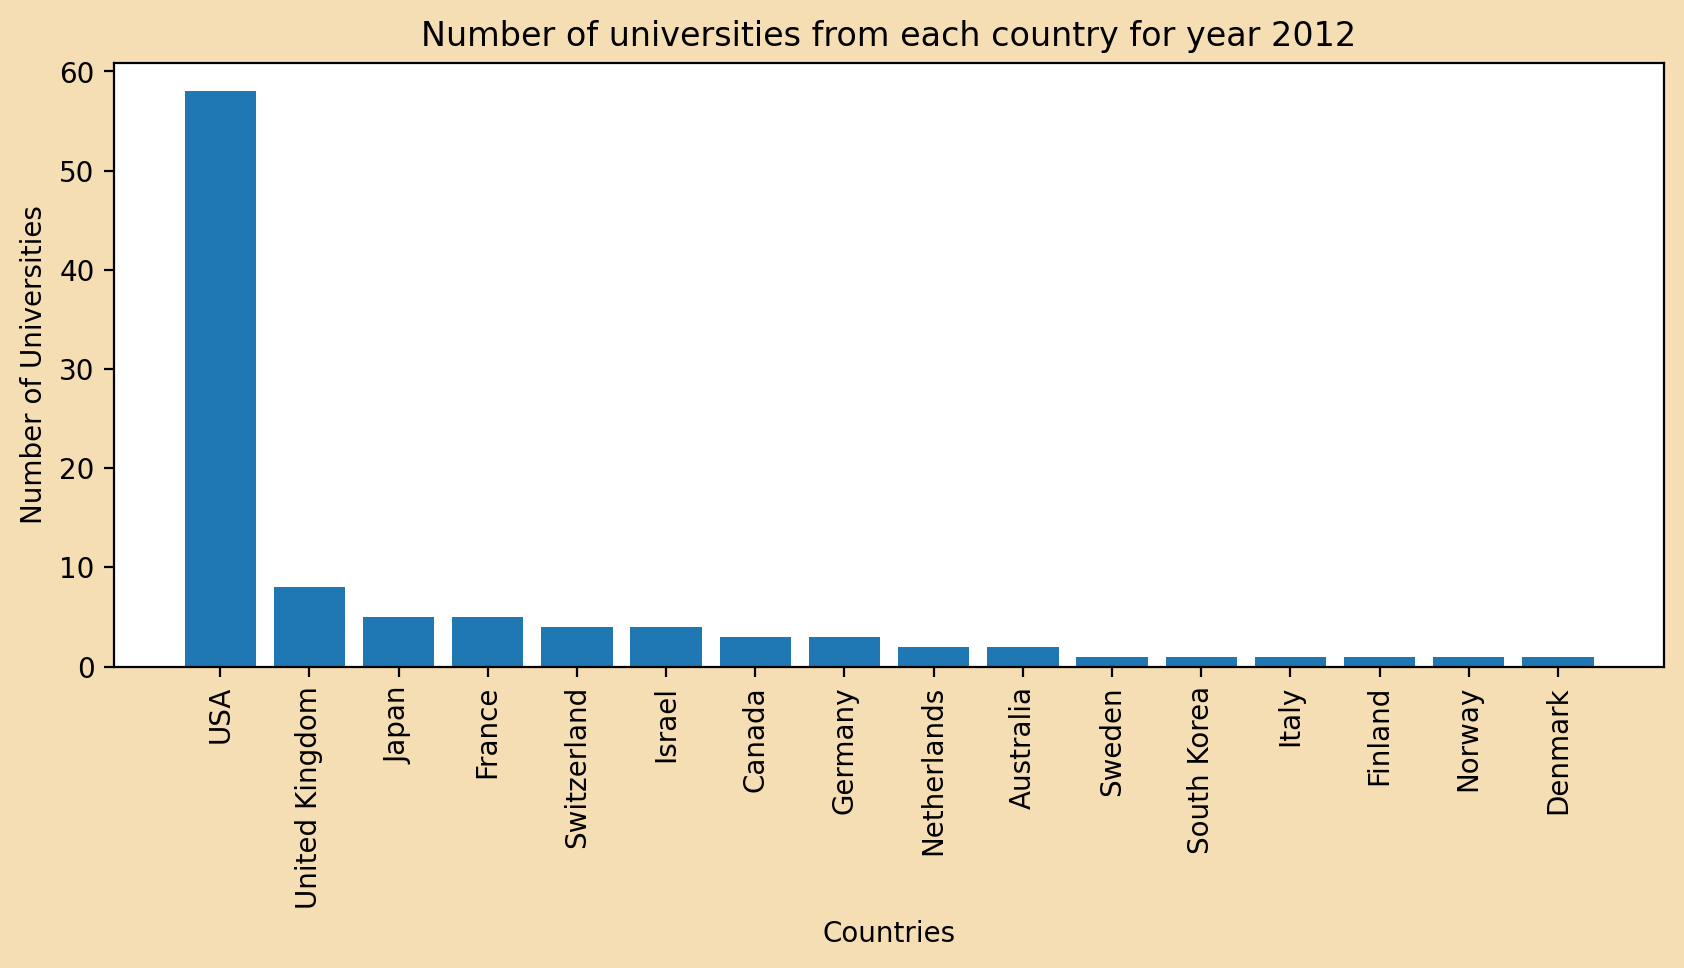

In [33]:
# using bar method from plt

figure = plt.figure(figsize=(10, 4), dpi=200, facecolor="wheat") # change background color using facecolor attribute

x = d.country.value_counts().index
y = d.country.value_counts().values

plt.bar(x, y)

plt.xticks(rotation=90)
plt.xlabel("Countries")
plt.ylabel("Number of Universities")
plt.title("Number of universities from each country for year 2012")

plt.show()